<h2>Project description</h2>.
    
(to the content).
Clients are offered two tariff plans: Smart and Ultra. In order to adjust the advertising budget, the commercial department wants to understand which plan brings in more money. You will do a preliminary analysis of the tariffs on a small sample of customers. You have the data of 500 "Megaline" (name of the company) users at your disposal: who they are, where they come from, what tariff they use, how many calls and messages each sent in 2018. You need to analyze customer behavior and draw a conclusion - which tariff is better.

    *Description of tariffs:*

<b>Tariff<b> <span style="color:blue">Smart:</span>

<ul><li>Monthly fee: 550 rubles.</li>
<li>Included 500 minutes of talk time, 50 messages and 15 GB of Internet traffic<li>
Fee for services above the tariff package:
One minute of talk time: 3 rubles</li>
<li>Message: 3 rubles</li>
<li>1 Mb of Internet traffic: 200 rubles</li></ul>
    
<b>Tariff<b> <span style="color:red">Ultra:</span>

<ul><li>Monthly fee: 1950 rubles
<li>3000 minutes of talk time, 1000 messages and 30 GB of Internet traffic are included</li>
<li>Cost of services over the tariff package:
1 minute of talk time: 1 ruble</li>
<li>message: 1 ruble</li>
<li>1 GB of Internet traffic: 150 rubles</li></ul>

<b>Please note: "Megaline" always rounds up the values of minutes and megabytes. If the user only spoke for 1 second, a whole minute is counted in the tariff.</b>
    
    
<b>Data description<b>
(to content)

Table <b>users</b> (information about users):

<ul><li>user_id - unique identifier of the user</li>
<li>first_name - user's name</li>
<li>last_name - user's last name</li>
<li>age - user's age (years)</li>
<li>reg_date - tariff activation date (day, month, year)</li>
<li>churn_date - date when user discontinued the tariff (if value is missing, then tariff was active at the moment of data uploading)</li>
<li>city - user's city of residence</li>
<li>tariff - name of tariff plan</li></ul>
    
    
Table <b>calls</b> (information about calls):
    

<ul><li>id - unique number of call</li>
<li>call_date - date of the call</li>
<li>duration - duration of the call in minutes</li>
<li>user_id - identifier of the user who made the call.</li></ul>
    
Table <b>messages</b> (information about messages):

<ul><li>id - message number</li>
<li>message_date - message date</li>
<li>user_id - identifier of the user who sent the message</li></ul>

    
Table <b>internet</b> (information about internet sessions):

<ul><li>id - unique session number</li>
<li>mb_used - amount of the Internet traffic spent during the session (in megabytes)</li>
<li>session_date - date of the Internet session</li>
<li>user_id - user ID</li></ul>
    
    
<b>Tariffs</b> table (information about tariffs):

<ul><li>tariff_name - tariff name</li>
<li>rub_monthly_fee - monthly subscription fee in rubles</li>
<li>minutes_included - number of minutes of conversation per month, included in the subscription fee</li>
<li>messages_included - number of messages per month included in the monthly subscription fee</li>
<li>mb_per_month_included - amount of the Internet traffic included in the subscription fee (in megabytes)</li>
<li>rub_per_minute - the cost of a minute of conversation over the tariff package (for example, if the tariff has 100 minutes </li><li>of conversation per month, then 101 minutes will be charged)</li>
<li>rub_per_message - cost of sending a message over the tariff package</li>
<li>rub_per_gb - the cost of one additional gigabyte of Internet traffic above the tariff package (1 gigabyte = 1024 megabytes)</li></ul>

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

Let's take a look at the <span style="color:red">"calls"</span> table

In [95]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [96]:
for column in calls.columns:
    print(column)
    print(calls[column].unique())

id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
call_date
['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '2018-06-18' '2018-10-2

In [97]:
calls['id'].value_counts()

1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

In [98]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

In [99]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

In [100]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Calls that lasted less than a minute we will count as a minute, because this is how company does it

In [101]:
calls_under_min = calls.query('0 <duration< 0.99 ')

In [102]:
calls_under_min['duration'].value_counts().sort_values(ascending=False)

0.23    115
0.96    105
0.68    103
0.83    102
0.98    101
       ... 
0.21     67
0.11     67
0.53     64
0.52     63
0.14     63
Name: duration, Length: 98, dtype: int64

In [103]:
calls['duration'] = calls['duration'].apply(np.ceil)

<h3>Let's take a look how call duration distributes using histogramm</h3>

<AxesSubplot:>

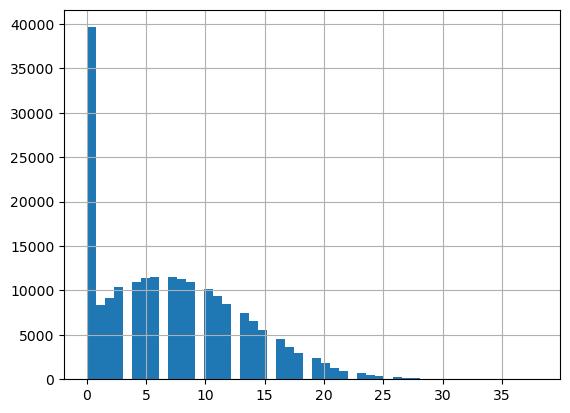

In [104]:
calls['duration'].hist(bins=50)

For the sake of being able to work with dates, let us convert the dates to the datetime format




In [105]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

In [106]:
for column in messages.columns:
    print(column)
    print(messages[column].unique())

id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
message_date
['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-08-13' '2018-12-31' '2018-06-10' '2018-0

In [107]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [108]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [109]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


<h3> No issues with the "messages" table

In [110]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [111]:
for column in internet.columns:
    print(column)
    print(internet[column].unique())

Unnamed: 0
[     0      1      2 ... 149393 149394 149395]
id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
mb_used
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
session_date
['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-11-04' '2018-06-16' '2018-12-07'
 '2018-08-25' '2018-06-15' '2018-06-26' '2018-10-06' '2018-12-01'
 '201

In [112]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [113]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

Let us check the histogramm of internet usage distribution

<AxesSubplot:>

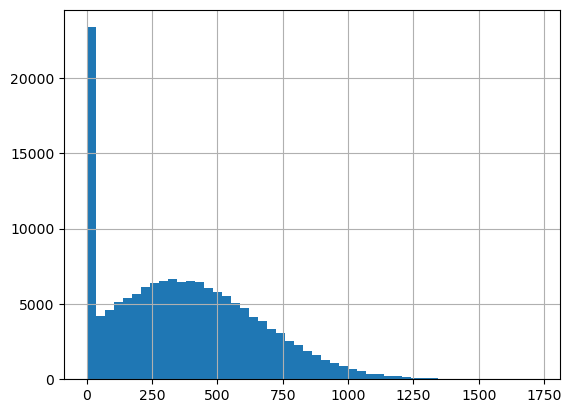

In [114]:
internet['mb_used'].hist(bins=50)

In [115]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

<AxesSubplot:>

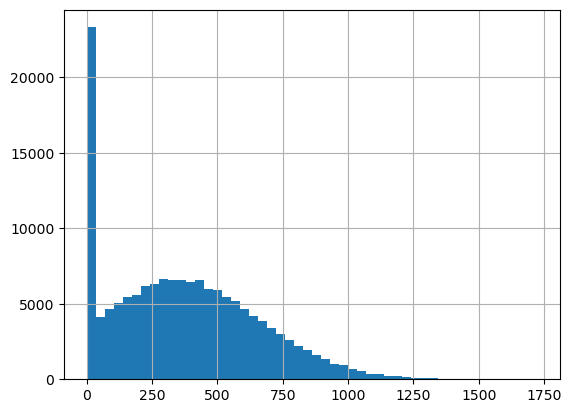

In [116]:
internet['mb_used'].hist(bins=50)

In [117]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


<h3>Many zeroes, this happens when a user is connected to the internet, but no usage is being made thereafter. We will get rid of them here<h3>

In [118]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)

In [119]:
internet['mb_used'].dropna(inplace=True)

<AxesSubplot:>

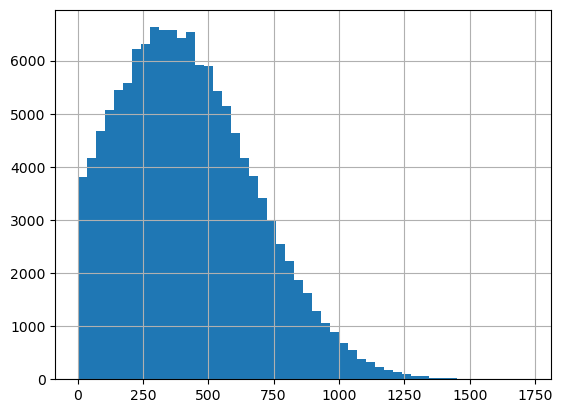

In [120]:
internet['mb_used'].hist(bins=50)

In [121]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<h3> "Tariffs" table looks completely normal

In [122]:
users.groupby('city').size()

city
Архангельск    1
Астрахань      4
Балашиха       5
Барнаул        3
Белгород       2
              ..
Челябинск      9
Череповец      3
Чита           4
Якутск         3
Ярославль      3
Length: 76, dtype: int64

In [123]:
users.pivot_table(index='city', values='user_id', aggfunc='count')

,user_id
city,
Архангельск,1
Астрахань,4
Балашиха,5
Барнаул,3
Белгород,2
...,...
Челябинск,9
Череповец,3
Чита,4


<h2> Let us see how cities differ in the ammount of consumers in them in %</h2>

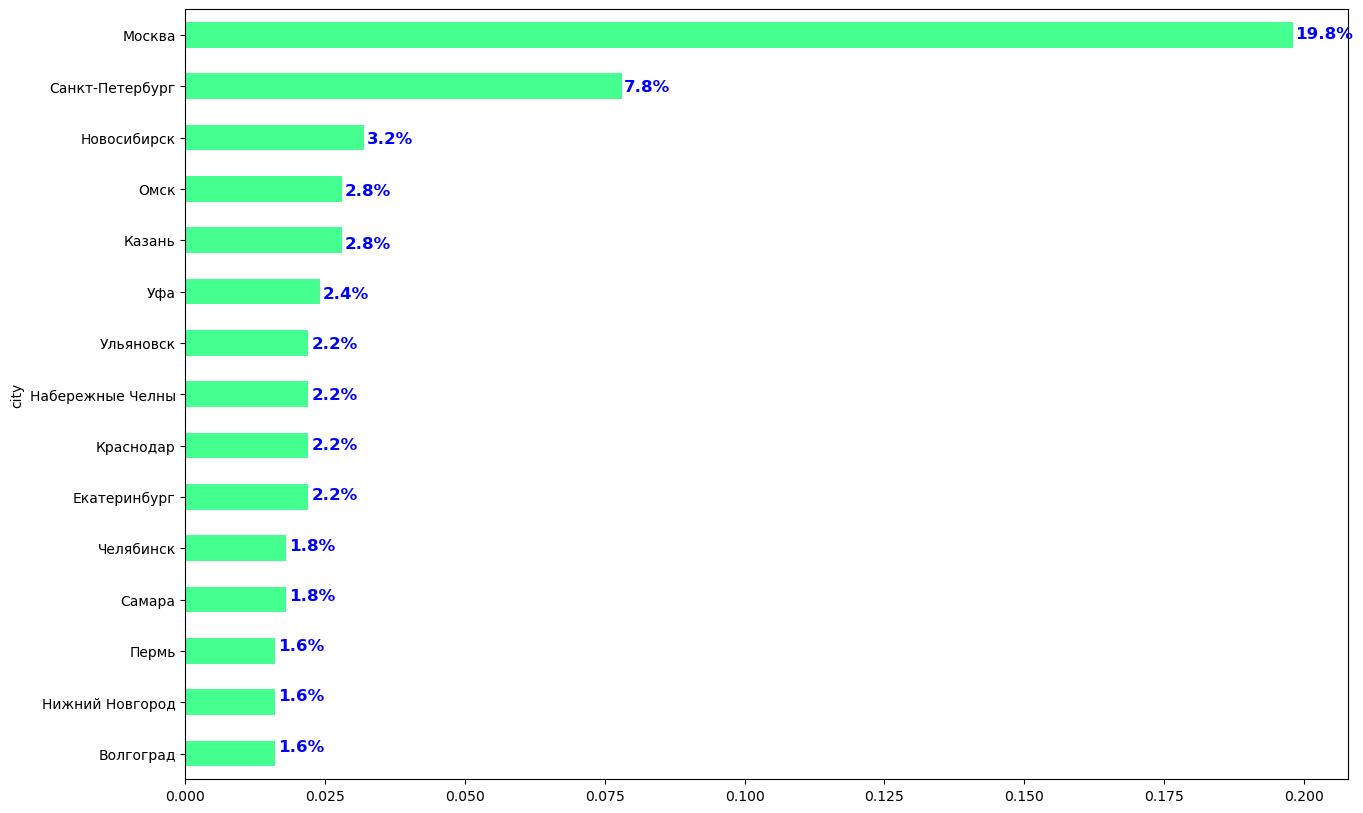

In [124]:
all_users = len(users)
df_for_barh = users.groupby('city').size()/all_users
df_for_barh_filtered = df_for_barh[df_for_barh > 0.015].sort_values()
ax = df_for_barh_filtered.plot(kind='barh', color='#45ff91', figsize=(15,10))

labels = dict(df_for_barh_filtered)
labels

i = 0
for city in labels:
    ax.text(labels[city] + 0.0005, i + 0.05, str(round(labels[city]*100, 6)) + '%', 
            fontsize = 'large', fontweight='bold', color='blue')
    if i < 9.7:
        i += 0.98
    else:
        i += 1.02

<h4>We will determine the location of the users, we might need that information later</h4>

In [125]:
import requests as r
list_of_cities = users['city'].unique().tolist()

url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=6917c6b1-3019-4d9c-bf87-1a6a110530fc&geocode='
coordinates = []

for city in list_of_cities:
    if city == city:
        url_formatted = url + city
        rsp = r.get(url_formatted).json()
        data = rsp['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        coordinate = (float(data.split()[1]), float(data.split()[0]))
        coordinates.append(coordinate)
    else:
        coordinates.append('')

In [126]:
unique_cities_coordinates = pd.DataFrame({'City':list_of_cities, 'Coordinates':coordinates})
unique_cities_coordinates.head(10)
dict_unique_cities_coord = dict(pd.Series(unique_cities_coordinates['Coordinates'].values, index=pd.Series(unique_cities_coordinates['City'].values)))

In [127]:
users['coordinates'] = users['city'].map(dict_unique_cities_coord)
users[['city','coordinates']]

,city,coordinates
0,Краснодар,"(45.03547, 38.975313)"
1,Москва,"(55.755864, 37.617698)"
2,Стерлитамак,"(53.630403, 55.930825)"
3,Москва,"(55.755864, 37.617698)"
4,Новокузнецк,"(53.757553, 87.136053)"
...,...,...
495,Иркутск,"(52.289588, 104.280606)"
496,Вологда,"(59.220501, 39.891523)"
497,Челябинск,"(55.159902, 61.402554)"
498,Владикавказ,"(43.024616, 44.681771)"


<h2>Let us now calculate for each user:<ol>
    <li>number of calls made and minutes used by month;</li>
    
<li>Messages sent by month;</li>
    
<li>Monthly amount of used Internet traffic;</li>
    
<li>Monthly revenue per user (subtract free limit from total calls, messages, and internet traffic; multiply balance by value from your plan; add monthly fees appropriate to your plan)..</li></ol></h2>

In [128]:
users['unique_name'] = users['city'] + ' ' + users['first_name'] + ' ' +  users['last_name']

In [129]:
users['unique_name']

0         Краснодар Рафаил Верещагин
1                   Москва Иван Ежов
2      Стерлитамак Евгений Абрамович
3              Москва Белла Белякова
4       Новокузнецк Татьяна Авдеенко
                   ...              
495          Иркутск Авксентий Фокин
496            Вологда Трифон Блохин
497        Челябинск Каролина Агеева
498     Владикавказ Всеволод Акимчин
499            Пермь Гектор Корнилов
Name: unique_name, Length: 500, dtype: object

We will merge the table calls on the table users and buld a pivot table to determine the number of <b>calls</b> and their duration for each user <b>monthly</b>

In [130]:
calls_merge = calls.merge(users, on='user_id', how='inner')
calls_pivot = calls_merge.pivot_table(index=['user_id', 'month'], 
                                      values=['duration', 'unique_name'], 
                                      aggfunc={'unique_name':'count', 'duration':'sum'})
calls_pivot.columns = ['duration', 'calls']
calls_pivot

duration  calls
user_id month                 
1000    5         159.0     22
        6         172.0     43
        7         340.0     47
        8         408.0     52
        9         466.0     58
...                 ...    ...
1498    10        247.0     41
1499    9          70.0      9
        10        449.0     68
        11        612.0     74
        12        492.0     69

[3174 rows x 2 columns]

In [131]:
messages['month'] = messages['message_date'].dt.month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


We will do the same procedure with the <b>messages</b> and <b>internet</b> tables

In [132]:
messages_merge = messages.merge(users, on='user_id', how='inner')
message_pivot = messages_merge.pivot_table(values='unique_name', 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_name': 'count'})
message_pivot.columns = ['messages']

In [133]:
message_pivot

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

In [134]:
internet['month'] = internet['session_date'].dt.month
internet_merge = internet.merge(users, on='user_id', how='inner')
internet_pivot = internet_merge.pivot_table(values = 'mb_used', 
                                            index=['user_id', 'month'],
                                            aggfunc={'mb_used': 'sum'})
internet_pivot

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3203 rows x 1 columns]

In [135]:
data_frames = [calls_pivot, message_pivot, internet_pivot]
data_frames

[               duration  calls
 user_id month                 
 1000    5         159.0     22
         6         172.0     43
         7         340.0     47
         8         408.0     52
         9         466.0     58
 ...                 ...    ...
 1498    10        247.0     41
 1499    9          70.0      9
         10        449.0     68
         11        612.0     74
         12        492.0     69
 
 [3174 rows x 2 columns],
                messages
 user_id month          
 1000    5            22
         6            60
         7            75
         8            81
         9            57
 ...                 ...
 1498    10           42
 1499    9            11
         10           48
         11           59
         12           66
 
 [2717 rows x 1 columns],
                mb_used
 user_id month         
 1000    5       2256.0
         6      23257.0
         7      14016.0
         8      14070.0
         9      14581.0
 ...                ...
 1498    10

Make a grouped data frame out of the pivot tables above

In [136]:
import functools
grouped = functools.reduce(lambda x, y:pd.merge(x,y, on=['user_id', 'month'], how='outer'), data_frames)

In [137]:
grouped.head(10)

duration  calls  messages  mb_used
user_id month                                    
1000    5         159.0   22.0      22.0   2256.0
        6         172.0   43.0      60.0  23257.0
        7         340.0   47.0      75.0  14016.0
        8         408.0   52.0      81.0  14070.0
        9         466.0   58.0      57.0  14581.0
        10        350.0   57.0      73.0  14717.0
        11        338.0   43.0      58.0  14768.0
        12        333.0   46.0      70.0   9827.0
1001    11        430.0   59.0       NaN  18452.0
        12        414.0   63.0       NaN  14053.0

<h3>Let us compute the revenue for each user according to the tariff he uses</h3>

In [138]:
grouped.loc[grouped['duration'].isna(), 'duration'] = 0
grouped.loc[grouped['messages'].isna(), 'messages'] = 0
grouped.loc[grouped['mb_used'].isna(), 'mb_used'] = 0

for user in grouped.index:
    grouped.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

def compound_revenue(row):
    #messages = row['messages']
    #mb_used = row['mb_used']
    #tariff = row['tariff']
    #duration = row['duration']
    #calls = row['calls']
    
    if row['tariff'] == 'smart':
        extra_duration = row['duration'] - tariffs.loc[0, 'minutes_included']
        extra_mb = row['mb_used'] - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = row['messages'] - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    elif row['tariff'] == 'ultra':
        extra_duration = row['duration'] - tariffs.loc[1, 'minutes_included']
        extra_mb = row['mb_used'] - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = row['messages'] - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

grouped['revenue'] = grouped.apply(compound_revenue, axis=1)
grouped.head(10)

duration  calls  messages  mb_used tariff     revenue
user_id month                                                       
1000    5         159.0   22.0      22.0   2256.0  ultra  1950.00000
        6         172.0   43.0      60.0  23257.0  ultra  1950.00000
        7         340.0   47.0      75.0  14016.0  ultra  1950.00000
        8         408.0   52.0      81.0  14070.0  ultra  1950.00000
        9         466.0   58.0      57.0  14581.0  ultra  1950.00000
        10        350.0   57.0      73.0  14717.0  ultra  1950.00000
        11        338.0   43.0      58.0  14768.0  ultra  1950.00000
        12        333.0   46.0      70.0   9827.0  ultra  1950.00000
1001    11        430.0   59.0       0.0  18452.0  smart  1153.90625
        12        414.0   63.0       0.0  14053.0  smart   550.00000

<h1>Data Analysis</h1>
<h2>Now we can move to statistical analysis and compute how much internet data users need monthly<h2>

we will compute median, variance and standart deviation:

In [139]:
median = grouped.pivot_table(index='user_id', values=['duration', 'calls', 'messages', 'mb_used'], aggfunc='median')
median

,calls,duration,mb_used,messages
user_id,,,,
1000,46.5,339.0,14325.5,65.0
1001,61.0,422.0,16252.5,0.0
1002,33.0,214.0,17601.0,11.0
1003,108.0,824.0,11368.0,83.0
1004,21.5,132.5,17828.5,154.5
...,...,...,...,...
1495,129.0,954.0,29393.0,82.0
1496,73.5,524.0,24067.5,41.5
1497,66.0,490.0,14174.0,17.0


In [140]:
#user_statistics = grouped.pivot_table(index='user_id', values=['duration', 'calls', 'messages', 'mb_used'], aggfunc=[np.std, np.var, np.median])

In [141]:
#user_statistics

In [142]:
user_statistics = grouped.pivot_table(index='user_id', 
                                       values=['duration', 'calls', 'messages', 'mb_used'], 
                                       aggfunc={'duration': [np.std, np.var, np.median],
                                                'calls': [np.std, np.var, np.median],
                                                'messages': [np.std, np.var, np.median],
                                                'mb_used': [np.std, np.var, np.median]})

In [143]:
for user_id in users['user_id']:
    median.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
    
median.dropna(subset=['duration'], inplace=True)
tariff_statistics = median.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std]})
tariff_statistics


duration                            mb_used                             \
         median         std           var   median          std           var   
tariff                                                                          
smart    439.75  160.266622  25685.390127  16948.0  4179.542704  1.746858e+07   
ultra    535.25  303.793641  92290.576519  19750.5  8901.168701  7.923080e+07   

       messages                          
         median        std          var  
tariff                                   
smart      28.5  28.010653   784.596662  
ultra      47.5  49.236809  2424.263318

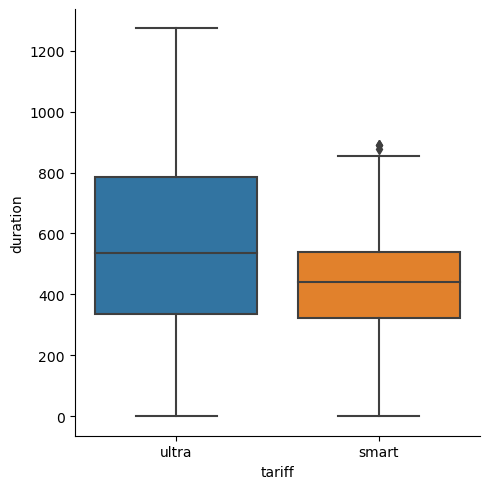

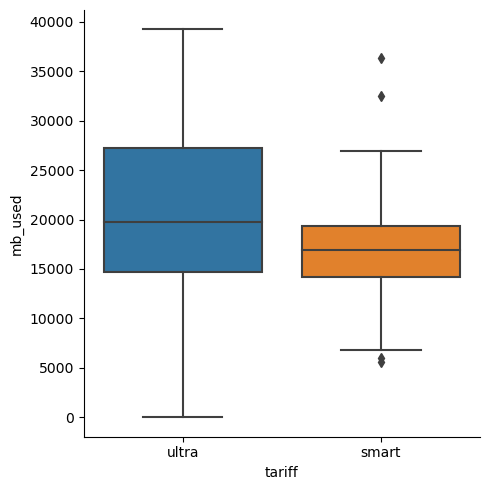

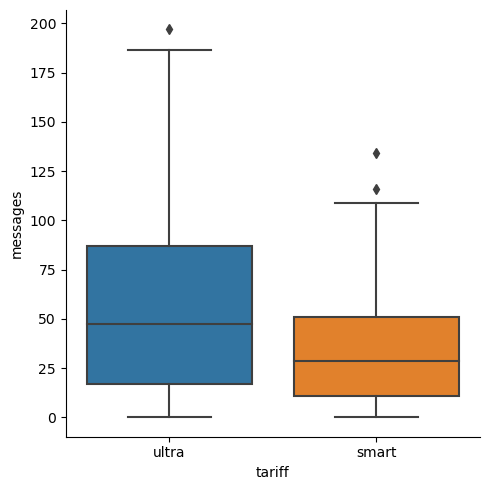

In [144]:
for column in ['duration', 'mb_used', 'messages']:    
    sns.catplot(x="tariff", y=column, kind="box", data=median, orient='v')

Call minutes, the number of messages, and the amount of Internet traffic spent in <b>Ultra</b> tariff have a larger dispersion than <b>Smart</b> tariff, and the medians for the above attributes are also shifted to the higher side. In addition, the drop outs within the cheaper tariff (smart) are significantly higher.

<h2> The behavior of ULTRA tariff users is more diverse in terms of consumption of telecommunications services. The users of the expensive tariff are more free to choose how exactly to use the volume of the tariff package: perhaps, using the expensive tariff helps them not to think about the fact that at some point they will have to turn off the Internet or run out of minutes of talk time. 

<h3> Lets confirm the hypothesis that the revenue coming from the users of both tariffs differ and moreover, that the users of ULTRA tariff make a bigger proportion of revenue compared to the tariff SMART</h3>

<b>H0</b>  — mean revenue of users of 'Smart' tariff does not differ from the revenue coming from 'Ultra' tariff.

<b>H1</b>  — the revenue of both tarrifs differ.

<b> α</b> =5%

In [145]:
import scipy as sp
smart = grouped.query('tariff == "smart"')['revenue']
ultra = grouped.query('tariff == "ultra"')['revenue']
a = 0.05
t_test = sp.stats.ttest_ind(smart, ultra, equal_var=False)
if t_test.pvalue < a:
    print('H0 can be rejected')
else: print('H0 can not be rejected')
print(f' p-value is...{t_test.pvalue}, that means, we can reject the null hypothesis')

H0 can be rejected
 p-value is...8.931402711368788e-296, that means, we can reject the null hypothesis


In [146]:
grouped.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1233.349467
ultra,2060.529971


In [147]:
grouped.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,959.898438
ultra,1950.000000


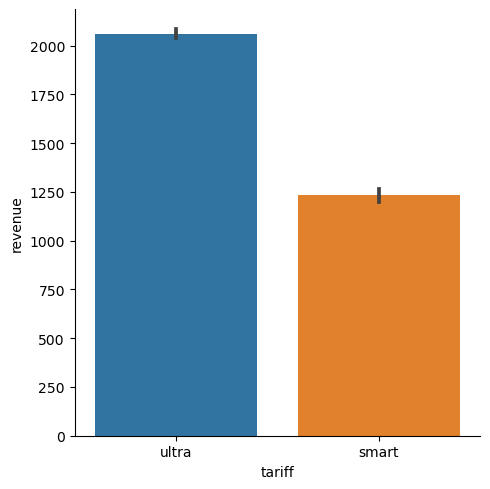

In [148]:
sns.catplot(x="tariff", y='revenue', kind="bar", data=grouped, orient='v')

<h3> With that we can postulate, with a 95% probability, that the revenue, that the company gets from clients using ULTRA tariff differs from that of ULTRA tariff clients, moreover, the company receives almost twice as much revenue from the clients, that use ULTRA tariff<h3>

<h5>We will do the same process to determine whether the revenue coming form users that live in Moscow city differ from those who live in regions</h5>

<b>H0</b>  — Mean revenue of Moscow users is equal to the revenue coming from users living outside Moscow

<b>H1</b>  — Mean revenue differs.

<b>α</b> =1%

In [149]:
for user in grouped.index:
    grouped.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow = grouped.query('city == "Москва"')['revenue']
regions = grouped.query('city != "Москва"')['revenue']

t_test2 = sp.stats.ttest_ind(moscow, regions, equal_var=False)
if t_test2.pvalue < a:
    print('H0 can be rejected')
else: print('H0 can not be rejected')

H0 can not be rejected


In [150]:
t_test2.pvalue


0.4549775646471024

In [151]:

#grouped['region'] = ['Москва' for i in grouped['region'] if city == 'Москва' else 'Регион']#grouped.query('city == "Москва"')
def city(city):
    if city == 'Москва':
        return 'Moscow'
    else: 
        return 'Region'

grouped['region'] = grouped['city'].apply(city)
moscow_pivot = grouped.pivot_table(index='region', values='revenue', aggfunc='mean')
moscow_pivot

,revenue
region,
Moscow,1507.276762
Region,1482.063727


In [152]:

moscow_pivot_median = grouped.pivot_table(index='region', values='revenue', aggfunc='median')
moscow_pivot_median

,revenue
region,
Moscow,1704.632812
Region,1518.078125


<h2>With this we can conclude, with the probability of 95 percent, that the revenue in Moscow and in region do not differ<h2>

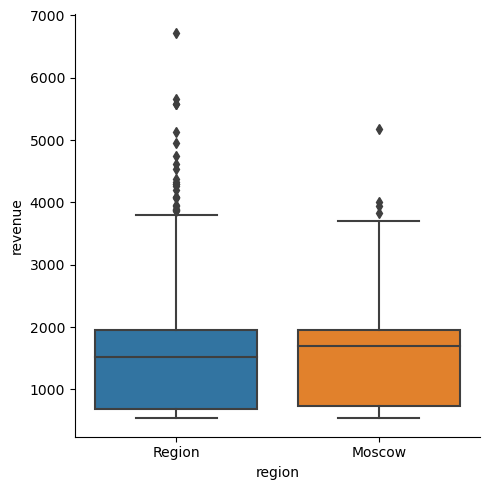

In [153]:
sns.catplot(x="region", y='revenue', kind="box", data=grouped, orient='v')
    
    

According to the results of statistical analysis, <b>income from Ultra tariff is higher than from Smart</b> tariff: on average, Megaline receives: <b>2060.53 rubles and 1233.35 rubles</b> from one user per month respectively.

<h3>Peculiarities of tariffs usage are as follows:</h3>

<h5>Average income from users in Moscow does not differ from income in other localities: the difference is statistically insignificant (p-value: 0.454, so if we said that the revenue differs, we would be wrong with a 45 percent probability) and amounts to 188 rubles: 1704.63 rubles in Moscow versus 1518.01 rubles in other localities. </h5>